# INTRODUCTION

This project is to compare airfare prices overall trends from 1995 to 2021, then focus on the differences between Q1 of 2020 and 2021. 

The COVID-19 pandemic had a profound effect on domestic travel in the U.S. The restrictions on travel guidelines and procedures left many airplanes empty. [source](https://www.wsj.com/articles/why-empty-planes-keep-flying-through-the-pandemic-11588771233). Consumers could plainly see that the price of airfare was falling.

**Questions:**

* Did the rates in 2021 deviate from overall trends of the previous 25 years?
* How do 2020 and 2021 differ?
* Do we see a difference in prices from all airports?

# METHODOLOGY

Data was taken from the [Bureau of Transportation Statistics](https://www.bts.gov), accessed on 10/5/2021.

All data information is for domestic travel.

**1. [Annual U.S. Domestic Average Itinerary Fare in Current and Constant Dollars](https://www.bts.gov/content/annual-us-domestic-average-itinerary-fare-current-and-constant-dollars)**

**CSV name: annual_fares.csv**

Source: 
Bureau of Transportation Statistics *Rate calculated using Bureau of Labor Statistics Consumer Price Index.

Itinerary Fares: 
BTS reports average fares based on domestic itinerary fares. Itinerary fares consist of round-trip fares, unless the customer does not purchase a return trip. In that case, the one-way fare is included. Fares are based on the total ticket value, which consists of the price charged by the airlines plus any additional taxes and fees levied by an outside entity at the time of purchase. Fares include only the price paid at the time of the ticket purchase and do not include fees for optional services, such as baggage fees. Averages do not include frequent-flyer or “zero fares.” Constant 2021 dollars are used for inflation adjustment.

Note: Percent change based on unrounded numbers


**2. [Average Domestic Airline Itinerary Fares By Origin City for Q1 2020](https://www.transtats.bts.gov/AverageFare/)**

**CSV name: Q1_2020.csv**

Source: 
Bureau of Transportation Statistics, Airline Origin & Destination Survey (10% Sample), DB1B_Ticket where bulk fare equals zero, itinerary fare is greater than or equal to fifty dollars and itinerary yield is less than or equal to three dollars.

Itinerary Fare: 
Average fares are based on domestic itinerary fares, round-trip or one-way for which no return is purchased. Fares are based on the total ticket value which consists of the price charged by the airlines plus any additional taxes and fees levied by an outside entity at the time of purchase. Fares include only the price paid at the time of the ticket purchase and do not include other fees, such as baggage fees, paid at the airport or onboard the aircraft. Averages do not include frequent-flyer or 'zero fares' or a few abnormally high reported fares. Airports* ranked by U.S. originating domestic passengers in 2020.


**3. [Average Domestic Airline Itinerary Fares By Origin City for Q1 2021](https://www.transtats.bts.gov/AverageFare/)**

**CSV name: Q1_2021.csv**

Source and Itinerary Fare information same as report for 2020.

# RESULTS

## 1. Import Libraries

In [173]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. Airfare from 1995 - 2021

### Import CSV

In [174]:
# Use pandas to read the csv

annual_fares = pd.read_csv('annual_fares.csv')

### Check Data for Whitespace and Conversion

In [175]:
# Check output and headings
annual_fares

,Year,Inflation_Adjusted_Fare,Average_Fare
0,1995,518,292
1,1996,482,277
2,1997,467,287
3,1998,495,309
4,1999,530,324
5,2000,527,339
6,2001,521,321
7,2002,473,312
8,2003,459,315
9,2004,452,305


In [176]:
# Check headers to rename without whitespace if needed
print(annual_fares.columns)

# Check data types
print(type(annual_fares.Year[0]))
print(type(annual_fares.Inflation_Adjusted_Fare[0]))
print(type(annual_fares.Average_Fare[0]))

Index(['Year', 'Inflation_Adjusted_Fare', 'Average_Fare'], dtype='object')
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


### Graph 1A: Fares Over Time, 1995 - 2021

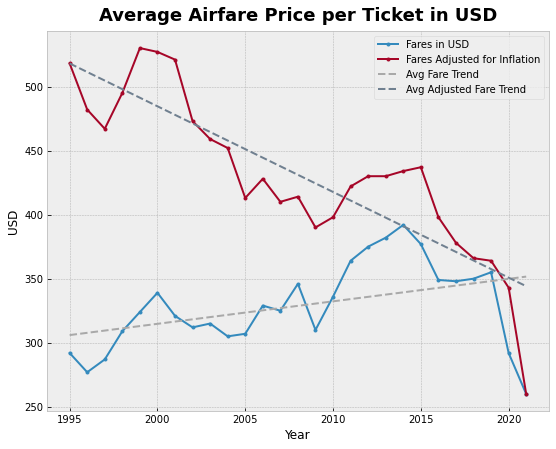

In [177]:
# LINE GRAPH OF AIRFARE OVER TIME


# Adjust size
plt.figure(figsize=(9,7))


# Change color palette
plt.style.use('bmh')


# Title
plt.title('Average Airfare Price per Ticket in USD', pad=10, fontdict={'fontweight': 'bold', 'fontsize': 18})


# X and Y Variables
x = annual_fares.Year
y = annual_fares.Average_Fare
y2 = annual_fares.Inflation_Adjusted_Fare


# X and Y Axis Labels
plt.xlabel('Year')
plt.ylabel('USD') 


# Trendlines, Degree 1 for Line
z = np.polyfit(x, y, 1)
z2 = np.polyfit(x, y2, 1)
p = np.poly1d(z)
p2 = np.poly1d(z2)


# Information to Graph
plt.plot(x, y, marker = '.', label = 'Fares in USD')
plt.plot(x, y2, marker = '.', label = "Fares Adjusted for Inflation")
plt.plot(x, p(x), color = '#A9A9A9', linestyle = '--', label = 'Avg Fare Trend')
plt.plot(x, p2(x), color = '#708090', linestyle = '--', label = 'Avg Adjusted Fare Trend')


# Show legend
plt.legend()


plt.show()

### Notes on Findings

* The highest average ticket price, adjusted for inflation, occurred in 1999 with a fare of `$324` and adjusted fare of `$530`. 

* The highest average ticket price, not adjusted, occurred in 2014 with a fare of `$392`.

* The lowest averge ticket price in the last 26 years, both in adjusted and not adjusted, occurred in Q1 of 2021 with a fare of `$260`.

* The average airfare in 2020 was also significantly lower than previous years. Dollar for dollar, it is the same price as the average ticket in 1995: `$292`. 

* The average airfare in 2020, had nothing disrupted the trends, would have been about `$350`. It was 16.57% less than expected at `$292`. 

## 3. Airfare from Q1 of 2020 and Q1 of 2021

### Import CSVs

In [178]:
# Use pandas to read the csv
airfare_2020 = pd.read_csv('Q1_2020.csv')
airfare_2021 = pd.read_csv('Q1_2021.csv')

### Check Data for Whitespace and Conversion

In [179]:
# Check chart and headings
airfare_2020

,2020_Passenger_Rank,Airport_Name,City_Name,State_Name,Average_Fare,Sample_Size
0,1,Los Angeles International,Los Angeles,CA,328.17,"513,309"
1,2,Hartsfield-Jackson Atlanta International,Atlanta,GA,359.58,"415,199"
2,3,Denver International,Denver,CO,295.96,"412,135"
3,4,Chicago O'Hare International,Chicago-O'Hare,IL,332.05,"401,710"
4,5,Dallas/Fort Worth International,Dallas-DFW,TX,400.52,"351,090"
...,...,...,...,...,...,...
424,424,Sand Point,Sandpoint,AK,729.00,4
425,426,Middle Georgia Regional,Macon,GA,426.00,3
426,426,Unalaska Airport,Unalaska,AK,1074.33,3
427,428,Wokal Field Glasgow Valley County,Glasgow,MT,332.00,2


In [180]:
# Check headers to rename without whitespace
airfare_2020.columns

Index(['2020_Passenger_Rank', ' Airport_Name ', ' City_Name ', ' State_Name ',
       ' Average_Fare ', ' Sample_Size '],
      dtype='object')

In [181]:
# Remove column header whitespce
airfare_2020.columns = airfare_2020.columns.str.strip()
airfare_2021.columns = airfare_2021.columns.str.strip()

In [182]:
# Check that columns are corrected
print(airfare_2020.columns)
print(airfare_2021.columns)

Index(['2020_Passenger_Rank', 'Airport_Name', 'City_Name', 'State_Name',
       'Average_Fare', 'Sample_Size'],
      dtype='object')
Index(['2020_Passenger_Rank', 'Airport_Name', 'City_Name', 'State_Name',
       'Average_Fare', 'Sample_Size'],
      dtype='object')


In [183]:
# Assign variables
sample20 = airfare_2020.Sample_Size
sample21 = airfare_2021.Sample_Size


# Check data type
print(type(sample20[0]))
print(type(sample21[0]))


# Delete Whitespace in Sample_Size columns
sample20 = sample20.str.strip()
sample21 = sample21.str.strip()


# Delete -NaN in 2021 list, add [:] to make mutable
sample21[:] = ['0' if x == '-NaN' else x for x in sample21]


# Convert from string to numeric
sample20 = sample20.str.replace(',', '').astype(int)
sample21 = sample21.str.replace(',', '').astype(int)

<class 'str'>
<class 'str'>


### Graph 2A: All U.S. Airports' Airfare, Q1 2020 and Q1 2021

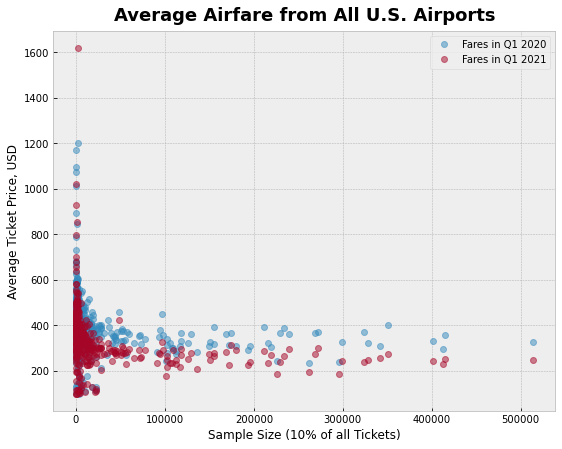

In [184]:
# GRAPH FOR ALL AIRPORTS, Q1 IN 2020 AND 2021


# Adjust size
plt.figure(figsize=(9,7))


# Title
plt.title('Average Airfare from All U.S. Airports', pad=10, fontdict={'fontweight': 'bold', 'fontsize': 18})


# X and Y Axis labels
plt.xlabel('Sample Size (10% of all Tickets)')
plt.ylabel('Average Ticket Price, USD') 


# Information to graph
x = sample20
y = airfare_2020.Average_Fare

x2 = sample21
y2 = airfare_2021.Average_Fare


# Scatter Plot
plt.plot(x, y, 'o', alpha=0.5, label='Fares in Q1 2020')
plt.plot(x2, y2, 'o', alpha=0.5, label='Fares in Q1 2021')


# Show legend
plt.legend()


plt.show()

### Notes on Findings

* There are outliers in the data amoung the smaller airports.
* Overall, the average fare per ticket amoung airports was significantly lower in Q1 of 2021 than Q1 of 2020.
* A few dozen airports appear to have the larger sample sizes, therefore the majority of total air travel. 

### Graph 2B: Busiest 100 Airports' Airfare, Q1 2020 and Q1 2021

The busiest 100 airports seem to have the bulk of ticket transactions, even though there are a total of 429 airports across the U.S. 

A pie chart with total sample size can confirm if this will be an accurate way to view the data, and how much business these airports contribute to all domestic flying. 

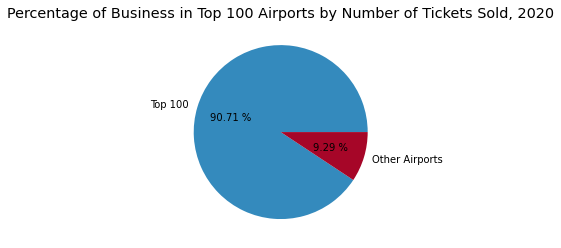

In [185]:
# COMPARE TICKETS SOLD IN TOP 100 V. AIRPORTS #101 - 129

# Assign Sample Size columns
top_100 = sample20[:100]
smaller_airports = sample20[100:]


# Get sum of sample sizes
sum_top_100 = sum(top_100)
sum_smaller_airports = sum(smaller_airports)


# Labels for Pir Chart
labels = ['Top 100', 'Other Airports']


# Title
plt.title('Percentage of Business in Top 100 Airports by Number of Tickets Sold, 2020')


# Get chart
plt.pie([sum_top_100, sum_smaller_airports], labels = labels, autopct = '%.2f %%')
plt.show()

Since the top 100 airports are responsible for over 90% of the total ticket sales, it would be reasonable to examine these airports more closely. 

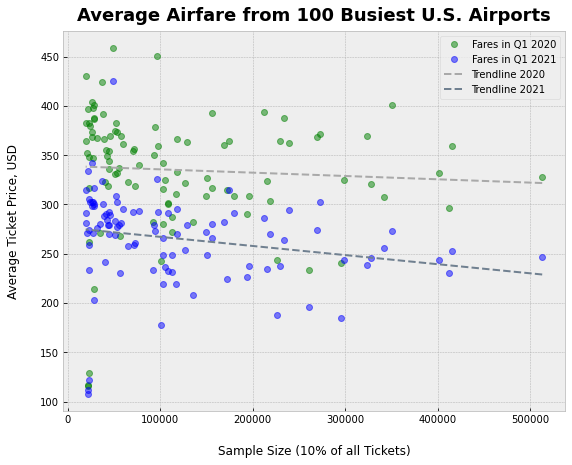

In [186]:
#GRAPH FOR BUSIEST 100 AIRPORTS, Q1 IN 2020 AND 2021

# Adjust size
plt.figure(figsize=(9,7))


# Title
plt.title('Average Airfare from 100 Busiest U.S. Airports', pad=10, fontdict={'fontweight': 'bold', 'fontsize': 18})


# X and Y Axis labels
plt.xlabel('Sample Size (10% of all Tickets)', labelpad=20)
plt.ylabel('Average Ticket Price, USD', labelpad=20) 


# Information to graph
x = sample20[:100]
y = airfare_2020.Average_Fare[:100]

x2 = sample21[:100]
y2 = airfare_2021.Average_Fare[:100]


# Trendlines, Degree 1 for Line
z = np.polyfit(x, y, 1)
z2 = np.polyfit(x, y2, 1)
p = np.poly1d(z)
p2 = np.poly1d(z2)


# Scatter Plot
plt.plot(x, y, 'go', alpha=0.5, label='Fares in Q1 2020')
plt.plot(x2, y2, 'bo', alpha=0.5, label='Fares in Q1 2021')
plt.plot(x, p(x), color = '#A9A9A9', linestyle = '--', label = 'Trendline 2020')
plt.plot(x, p2(x), color = '#708090', linestyle = '--', label = 'Trendline 2021')


# Show legend
plt.legend()


plt.show()

### Notes on Findings

* The busier the airport is, the more substancial a difference in average airfare price. 
* There was a statisticly significant difference in average rates from Q1 2020 to Q1 2021. 

### Ten Busiest Airports

Within the whole of the Top 100 airports, it would be interesting to see what percentage the top 10 airports contribute to overall domestic travel. 

### Graph 2C: Pie Chart of Ten Busiest Airports' Airfare

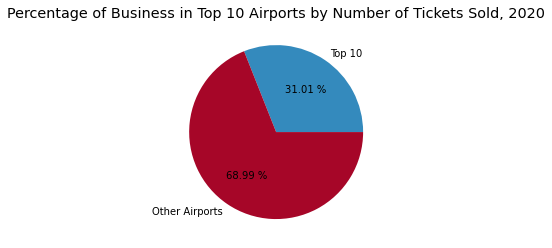

In [187]:
# COMPARE TICKETS SOLD IN TOP 10 V. AIRPORTS #11-100

# Assign Sample Size columns
top_10 = sample20[:10]
other_airports = sample20[10:100]


# Get sum of sample sizes
sum_top_10 = sum(top_10)
sum_other_airports = sum(other_airports)


# Labels for Pir Chart
labels = ['Top 10', 'Other Airports']


# Title
plt.title('Percentage of Business in Top 10 Airports by Number of Tickets Sold, 2020')


# Get chart
plt.pie([sum_top_10, sum_other_airports], labels = labels, autopct = '%.2f %%')
plt.show()

### Notes on Findings

* Of the busiest 100 airports, the 10 busiest make up 31.01% of the total domestic travel.

### Graph 2D: Bar Graph of Ten Busiest Airports' Airfare

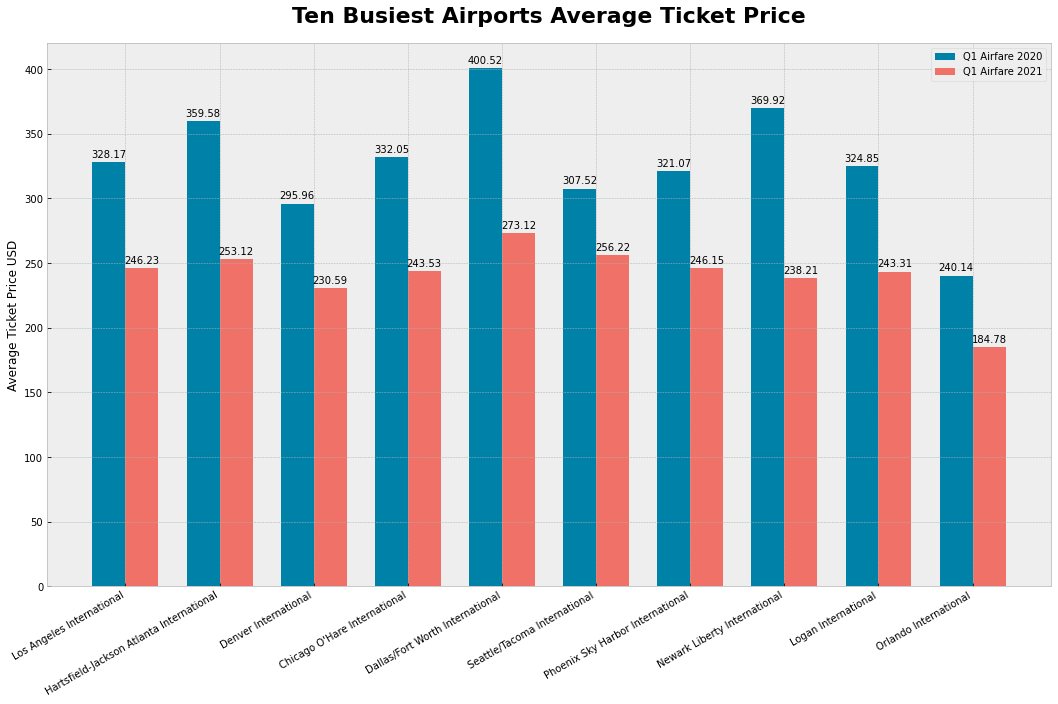

In [188]:
# BAR GRAPH FOR FIVE BUSIEST AIRPORTS


# Information to Graph
labels = airfare_2020['Airport_Name'][:10]
y = airfare_2020['Average_Fare'][:10]
y2 = airfare_2021['Average_Fare'][:10]


# Numpy for evenly spaced values
x = np.arange(len(labels))


# Bar width
width = 0.35


# Set figure and axes objects, increase graph size
fig, ax = plt.subplots(figsize=(18,10))


# Bars 
rects1 = ax.bar(x - width/2, y, width, color="#0081A7", label="Q1 Airfare 2020")
rects2 = ax.bar(x + width/2, y2, width, color="#F07167", label="Q1 Airfare 2021")


# Title
ax.set_title('Ten Busiest Airports Average Ticket Price', pad=20, fontdict={'fontweight': 'bold', 'fontsize': 22})


# X and Y Axis
plt.xticks(x, labels, rotation=30, horizontalalignment='right')
ax.set_ylabel('Average Ticket Price USD')


# Add labels and annotations to bar containers
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


# Add Legend
ax.legend()


plt.show()

### Make a New Dataframe

We have a CSV for 2020, and 2021, but we want to have a small dataframe for the Top 10 airports that have information from both these CSVs. 

Once we have this new dataframe, it will be easier to compare Q1 for 2020 and Q1 for 2021. 

In [189]:
# Data to include
fare2020 = airfare_2020['Average_Fare'][:10]
fare2021 = airfare_2021['Average_Fare'][:10]
airport = airfare_2020['Airport_Name'][:10]


# Set columns
df = pd.DataFrame(columns=['fare2020', 'fare2021', 'airport'])


# Add data
df['fare2020'], df['fare2021'], df['airport'] = fare2020, fare2021, airport


# Check chart
print(df)

   fare2020  fare2021                                   airport
0    328.17    246.23                 Los Angeles International
1    359.58    253.12  Hartsfield-Jackson Atlanta International
2    295.96    230.59                      Denver International
3    332.05    243.53              Chicago O'Hare International
4    400.52    273.12           Dallas/Fort Worth International
5    307.52    256.22              Seattle/Tacoma International
6    321.07    246.15          Phoenix Sky Harbor International
7    369.92    238.21              Newark Liberty International
8    324.85    243.31                       Logan International
9    240.14    184.78                     Orlando International


In [190]:
# Find difference in rates
df['diff_usd'] = df['fare2020'] - df['fare2021']

df['perc_decrease'] = (df['diff_usd']/df['fare2020']) * 100
df

,fare2020,fare2021,airport,diff_usd,perc_decrease
0,328.17,246.23,Los Angeles International,81.94,24.968766
1,359.58,253.12,Hartsfield-Jackson Atlanta International,106.46,29.606763
2,295.96,230.59,Denver International,65.37,22.087444
3,332.05,243.53,Chicago O'Hare International,88.52,26.658636
4,400.52,273.12,Dallas/Fort Worth International,127.40,31.808649
5,307.52,256.22,Seattle/Tacoma International,51.30,16.681842
6,321.07,246.15,Phoenix Sky Harbor International,74.92,23.334475
7,369.92,238.21,Newark Liberty International,131.71,35.604996
8,324.85,243.31,Logan International,81.54,25.100816
9,240.14,184.78,Orlando International,55.36,23.053219


In [192]:
# Sort by percentage of decrease

df_sorted = df.sort_values(by='perc_decrease', ascending=False)
df_sorted

,fare2020,fare2021,airport,diff_usd,perc_decrease
7,369.92,238.21,Newark Liberty International,131.71,35.604996
4,400.52,273.12,Dallas/Fort Worth International,127.40,31.808649
1,359.58,253.12,Hartsfield-Jackson Atlanta International,106.46,29.606763
3,332.05,243.53,Chicago O'Hare International,88.52,26.658636
8,324.85,243.31,Logan International,81.54,25.100816
0,328.17,246.23,Los Angeles International,81.94,24.968766
6,321.07,246.15,Phoenix Sky Harbor International,74.92,23.334475
9,240.14,184.78,Orlando International,55.36,23.053219
2,295.96,230.59,Denver International,65.37,22.087444
5,307.52,256.22,Seattle/Tacoma International,51.30,16.681842
